# Sarter Notebook

In [710]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import haversine as hs
from matplotlib.patches import Rectangle
from mpl_toolkits.basemap import Basemap as bm

## Reading Data

In [715]:
# read train data
df_orders = pd.read_csv("orders.csv", sep=",")
df_products = pd.read_csv("product_attributes.csv", sep=",")
df_dists = pd.read_csv("cities_data.csv", sep=";")
ordersXproducts = pd.read_csv("ordersXproducts.csv", sep=",")
finaldf = pd.read_csv("finaldf.csv", sep=",")

# read test data
df_test = pd.read_csv("test.csv", sep=";")

,Unnamed: 0,order_id,origin_port,3pl,customs_procedures,logistic_hub,customer,product_id,units,late_order
0,0,366c7a3d298f,Rotterdam,v_002,DTP,Venlo,Marseille,1692723,583,1
1,1,45f906331e10,Rotterdam,v_004,CRF,Rome,Marseille,1644308,459,0
2,2,ac84a6e4af0f,Athens,v_002,CRF,Venlo,Paris,1684170,464,1
3,3,f5e98cb29790,Rotterdam,v_004,CRF,Lille,Milan,1620510,678,0
4,4,a9e7c9bee35b,Barcelona,v_002,CRF,Venlo,Berlin,1699372,353,0
...,...,...,...,...,...,...,...,...,...,...
114271,114271,3f4b15fb770e,Rotterdam,v_002,CRF,Dusseldorf,Bordeaux,1681376,645,0
114272,114272,d2e6978a38fd,Barcelona,v_004,DTD,Dusseldorf,Berlin,1676942,502,0
114273,114273,b88babd5c7bd,Rotterdam,v_002,DTP,Dusseldorf,Rome,1692737,464,0
114274,114274,b0b5c761613f,Barcelona,v_003,DTD,Dusseldorf,Munich,1699974,388,0


In [716]:
# Canviar els noms per tal que sigui consistent en ORIGIN PORT
df_orders["origin_port"] = df_orders["origin_port"].replace(["ATHENAS"], "Athens")
df_orders["origin_port"] = df_orders["origin_port"].replace(["BCN"], "Barcelona")

[['Athens', 'Barcelona', 'Rotterdam'], [0.3741508954193759, 0.2702263870848024, 0.16921047383841328]]


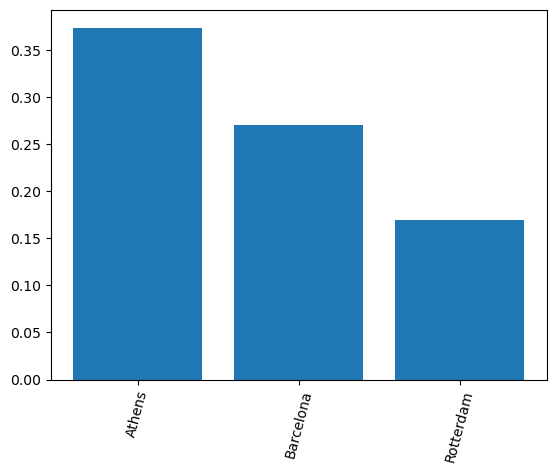

In [717]:
counts = df_orders["late_order"].groupby(df_orders["origin_port"]).value_counts()

ports = df_orders.origin_port.unique()
ports.sort()
data = []
lateness_ratio = [[],[]]
for i in range(len(ports)):
    lateness_ratio[0].append(ports[i])
    lateness_ratio[1].append(counts[2*i + 1]/(counts[2*i] + counts[2*i + 1]))
    data.append((counts[2*i] + counts[2*i + 1], counts[2*i + 1]))

print(lateness_ratio)
plt.bar(lateness_ratio[0], lateness_ratio[1])
plt.xticks(rotation = 75)
plt.show()

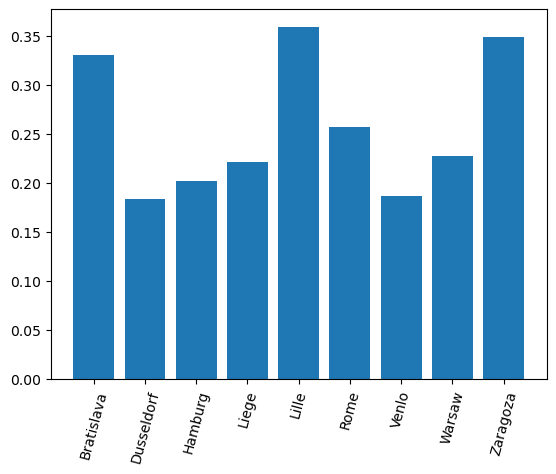

In [718]:
counts = df_orders["late_order"].groupby(df_orders["logistic_hub"]).value_counts()

hubs_a = df_orders.logistic_hub.unique()
hubs = []
for i in hubs_a:
    if type(i) is not float:
        hubs.append(i)

hubs.sort()

lateness_ratio = [[],[]]
for i in range(len(hubs)):
    lateness_ratio[0].append(hubs[i])
    lateness_ratio[1].append(counts[2*i + 1]/(counts[2*i] + counts[2*i + 1]))
    
plt.bar(lateness_ratio[0], lateness_ratio[1])
plt.xticks(rotation = 75)
plt.show()

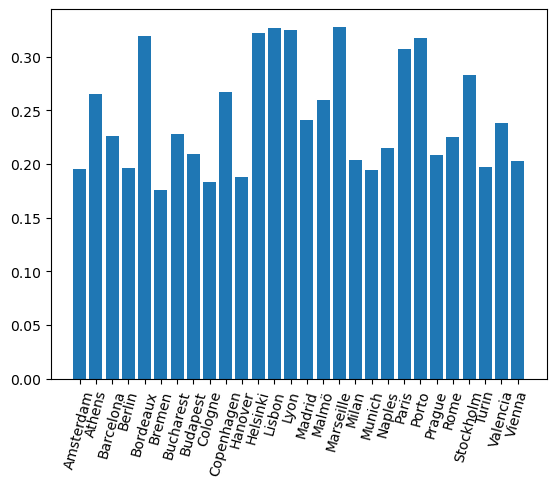

In [719]:
counts = df_orders["late_order"].groupby(df_orders["customer"]).value_counts()

destins = df_orders.customer.unique()
destins.sort()

lateness_ratio = [[],[]]
for i in range(len(destins)):
    lateness_ratio[0].append(destins[i])
    lateness_ratio[1].append(counts[2*i + 1]/(counts[2*i] + counts[2*i + 1]))

plt.bar(lateness_ratio[0], lateness_ratio[1])
plt.xticks(rotation = 75)
plt.show()

In [224]:
counts = ordersXproducts["late_order"].groupby(ordersXproducts["material_handling"]).value_counts()

mat = ordersXproducts.material_handling.unique()
mat.sort()

mate = mat[0:6]

[0. 1. 2. 3. 4. 5.]


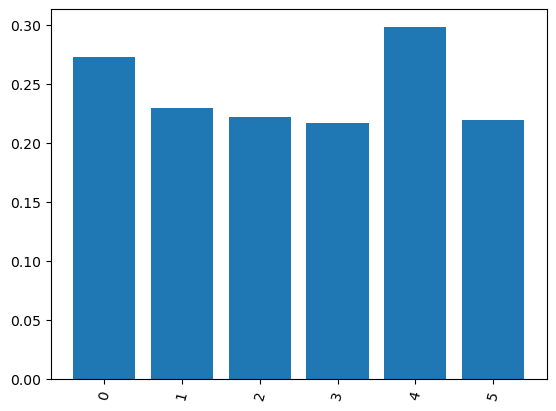

In [225]:

lateness_ratio = [[],[]]
for i in range(len(mate)):
    lateness_ratio[0].append(mate[i])
    lateness_ratio[1].append(counts[i][1]/(counts[i][0] + counts[i][1]))

plt.bar(lateness_ratio[0], lateness_ratio[1])
plt.xticks(rotation = 75)
plt.show()

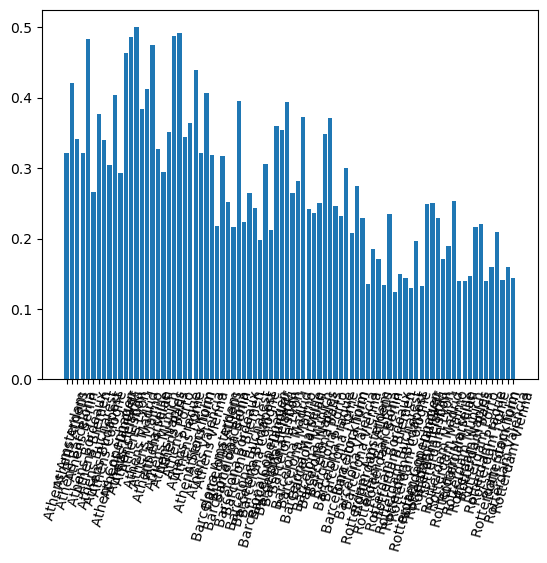

In [720]:
counts = df_orders["late_order"].groupby([df_orders["origin_port"], df_orders["customer"]]).value_counts()
ports = df_orders.origin_port.unique()
customers = df_orders.customer.unique()
ports.sort()
customers.sort()
lateness_ratio = [[],[]]
k = 0
for i in range(len(ports)):
    for j in range(len(customers)):
        lateness_ratio[0].append(ports[i] + " " + customers[j])
        lateness_ratio[1].append(counts[2*k + 1]/(counts[2*k] + counts[2*k + 1]))
        k += 1

plt.bar(lateness_ratio[0], lateness_ratio[1])
plt.xticks(rotation = 75)
plt.show()

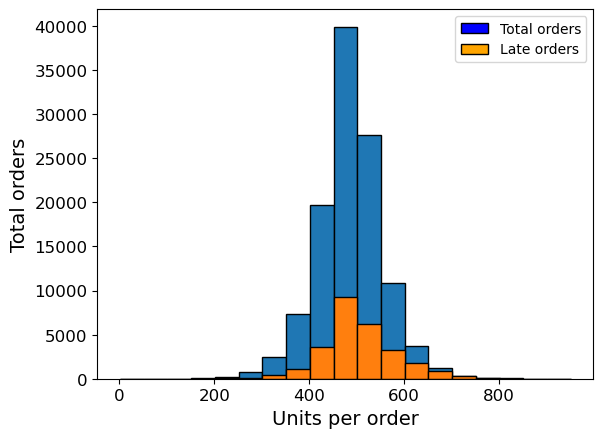

In [450]:
counts = df_orders["units"].groupby(df_orders["units"]).value_counts()
c = df_orders["units"].value_counts()

df_orders2 = df_orders.copy()
df_orders2["late_order"] = df_orders2["late_order"].astype(int)
df_orders2 = df_orders2.drop(df_orders2[df_orders2.late_order < 1].index)

cc = df_orders2["units"].value_counts()

cprima = c.sort_index() # nombre de comandes amb cada nombre d'unitats ordenades
ccprima = cc.sort_index() # nombre de comandes fallides amb cada nombre d'unitats ordenades

ctripleprima = []
for i in cprima.index.values:
    for j in range(cprima[i]):
        ctripleprima.append(i)

cctripleprima = []
for i in ccprima.index.values:
    for j in range(ccprima[i]):
        cctripleprima.append(i)
        
        k = 1

ccprimaprima = [0]
for i in ccprima.index.values:
    if i < 50*k:
        ccprimaprima[k - 1] += ccprima[i]
    else:
        ccprimaprima.append(ccprima[i])
        k += 1

plt.hist(ctripleprima, bins = 19, edgecolor = 'black')
plt.hist(cctripleprima, bins = 19, edgecolor = 'black')
plt.xlabel("Units per order", fontsize=14)  
plt.ylabel("Total orders", fontsize=14)
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)

#create legend
handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in ["blue","orange"]]
labels= ["Total orders","Late orders"]
plt.legend(handles, labels)

cprimaprima = [0]
k = 1
for i in cprima.index.values:
    if i < 50*k:
        cprimaprima[k - 1] += cprima[i]
    else:
        cprimaprima.append(cprima[i])
        k += 1

a= []
for j in range(1, 20):
    a.append(j)
# ax.set_yscale('log') per ara no funciona

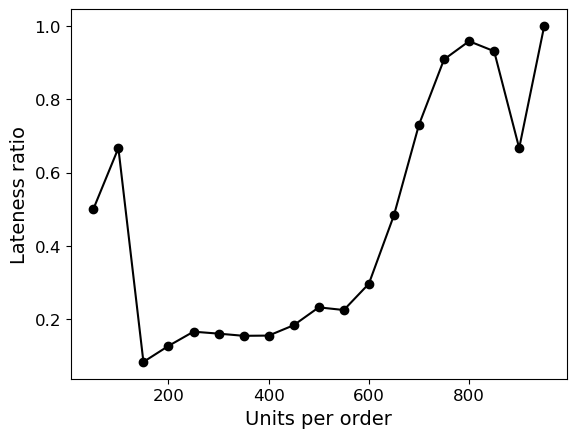

In [454]:
ratios = [[],[]]
for k in range(len(cprimaprima)):
    ratios[0].append((k + 1)*50)
    if (cprimaprima[k] != 0):
        ratios[1].append(ccprimaprima[k]/cprimaprima[k])
    else:
        ratios[1].append(0)

plt.plot(ratios[0], ratios[1], 'ko-')
plt.xlabel("Units per order", fontsize=14)  
plt.ylabel("Lateness ratio", fontsize=14)
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)
plt.show()

## Dummy Model

In [352]:
from sklearn.dummy import DummyClassifier

X_train = df_orders.drop(['late_order'], axis=1)
y_train = df_orders['late_order']

X_test = df_test

dummy_clf = DummyClassifier(strategy="uniform")
dummy_clf.fit(X_train, y_train)

pred_proba = dummy_clf.predict_proba(X_test)

## Save Solution
> **Note:** Submited probabilities must be for the **True** cases.

In [ ]:
submission = pd.DataFrame({"order_id": X_test.order_id, "late_order": pred_proba[:,1]})
submission.to_csv("submission_kaggle.csv", index=False)

In [739]:
def read_coor(entry):
    c = entry.split()
    d = c[0].split('(')
    f = d[1].split(',')
    e = c[1].split(')')
    return (float(f[0]), float(e[0]))

def calculate_distance(city1name, city2name, cities):
    coor1 = read_coor(cities[city1name])
    coor2 = read_coor(cities[city2name])
    distance = hs.haversine(coor1, coor2)
    return distance

d = df_dists.to_numpy()
cities = {}
for a in d:
    if a[0] not in cities:
        cities[a[0]] = a[2]
    if a[1] not in cities:
        cities[a[1]] = a[3]

city = [[],[]]        
for a in cities:
    c = read_coor(cities[a])
    city[0].append(c[0])
    city[1].append(c[1])
    

['', '48.1516988,']
['', '52.3727598,']
['', '48.1516988,']
['', '52.3727598,']
['', '48.1516988,']
['', '37.9839412,']
['', '48.1516988,']
['', '37.9839412,']
['', '48.1516988,']
['', '41.3828939,']
['', '48.1516988,']
['', '41.3828939,']
['', '48.1516988,']
['', '52.5170365,']
['', '48.1516988,']
['', '52.5170365,']
['', '48.1516988,']
['', '44.841225,']
['', '48.1516988,']
['', '44.841225,']
['', '48.1516988,']
['', '53.0758196,']
['', '48.1516988,']
['', '53.0758196,']
['', '48.1516988,']
['', '44.4361414,']
['', '48.1516988,']
['', '44.4361414,']
['', '48.1516988,']
['', '47.4979937,']
['', '48.1516988,']
['', '47.4979937,']
['', '48.1516988,']
['', '50.938361,']
['', '48.1516988,']
['', '50.938361,']
['', '48.1516988,']
['', '55.6867243,']
['', '48.1516988,']
['', '55.6867243,']
['', '48.1516988,']
['', '52.3744779,']
['', '48.1516988,']
['', '52.3744779,']
['', '48.1516988,']
['', '60.1674881,']
['', '48.1516988,']
['', '60.1674881,']
['', '48.1516988,']
['', '38.7077507,']
['',

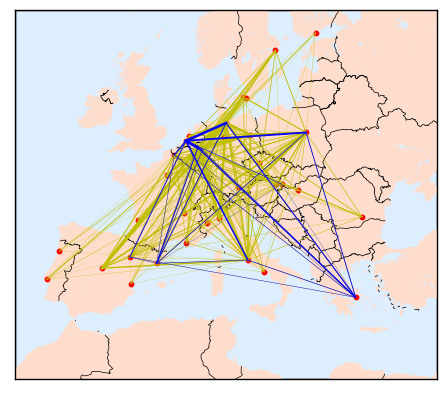

In [736]:
m = Basemap(projection='gnom', lat_0=47.5, lon_0=10., width=4000000, height=3500000, resolution='h')
m.fillcontinents(color="#FFDDCC", lake_color='#DDEEFF')
m.drawmapboundary(fill_color="#DDEEFF")
m.drawcountries()

#m.drawcoastlines()
#m.plot((6, 7),(51, 45),latlon=True, linewidth=1.5)
#m.plot((lon[0], lon[28]),(lat[0], lat[28]),latlon=True, linewidth=3)

counts = df_orders["units"].groupby([df_orders["logistic_hub"], df_orders["customer"]]).sum()
i = 0
for pair in counts.index:
        m.plot((read_coor(cities[pair[0]])[1], read_coor(cities[pair[1]])[1]),(read_coor(cities[pair[0]])[0], 
                read_coor(cities[pair[1]])[0]),latlon=True, linewidth=2*(counts[i]/max(counts)), color='y')
        i+=1

counts = df_orders["units"].groupby([df_orders["origin_port"], df_orders["logistic_hub"]]).sum()
i = 0
for pair in counts.index:
        m.plot((read_coor(cities[pair[0]])[1], read_coor(cities[pair[1]])[1]),(read_coor(cities[pair[0]])[0], 
                read_coor(cities[pair[1]])[0]),latlon=True, linewidth=2*(counts[i]/max(counts)), color='b')
        i+=1

lat = city[0]
lon = city[1]
m.scatter(lon, lat, latlon=True, c='r', s=10)

plt.show()

In [750]:
counts = df_orders["units"].groupby(df_orders["customer"]).sum()
a = np.array(counts)
c = np.array(counts.index)

city = [[],[]]        
for k in c:
    c = read_coor(cities[k])
    city[0].append(c[0])
    city[1].append(c[1])


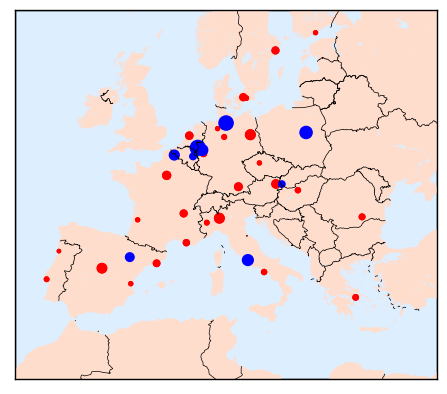

In [753]:
m = Basemap(projection='gnom', lat_0=47.5, lon_0=10., width=4000000, height=3500000, resolution='h')
m.fillcontinents(color="#FFDDCC", lake_color='#DDEEFF')
m.drawmapboundary(fill_color="#DDEEFF")
m.drawcountries()

lat = city[0]
lon = city[1]
m.scatter(lon, lat, latlon=True, c='r', s=a*0.00001)


counts = df_orders["units"].groupby(df_orders["logistic_hub"]).sum()
a2 = np.array(counts)
c2 = np.array(counts.index)

city2 = [[],[]]        
for k in c2:
    c2 = read_coor(cities[k])
    city2[0].append(c2[0])
    city2[1].append(c2[1])

lat2 = city2[0]
lon2 = city2[1]
m.scatter(lon, lat, latlon=True, c='r', s=a*0.00001)
m.scatter(lon2, lat2, latlon=True, c='b', s=a2*0.00001)

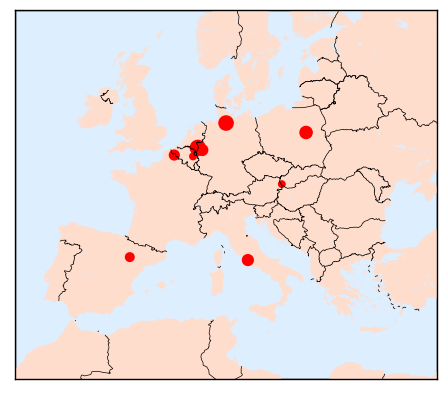

In [747]:
counts = df_orders["units"].groupby(df_orders["logistic_hub"]).sum()
a = np.array(counts)
c = np.array(counts.index)

city = [[],[]]        
for k in c:
    c = read_coor(cities[k])
    city[0].append(c[0])
    city[1].append(c[1])
    
m = Basemap(projection='gnom', lat_0=47.5, lon_0=10., width=4000000, height=3500000, resolution='h')
m.fillcontinents(color="#FFDDCC", lake_color='#DDEEFF')
m.drawmapboundary(fill_color="#DDEEFF")
m.drawcountries()

lat = city[0]
lon = city[1]
m.scatter(lon, lat, latlon=True, c='r', s=a*0.00001)


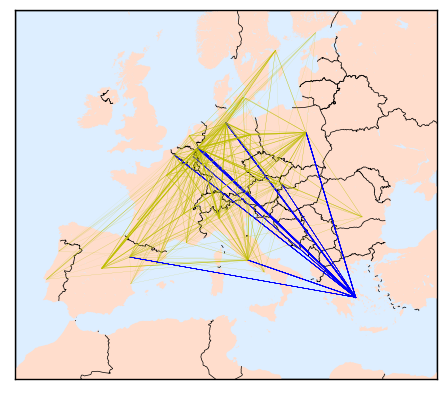

In [609]:
counts = df_orders["units"].groupby([df_orders["origin_port"], df_orders["logistic_hub"], df_orders["customer"]]).sum()

m = Basemap(projection='gnom', lat_0=47.5, lon_0=10., width=4000000, height=3500000, resolution='h')
m.fillcontinents(color="#FFDDCC", lake_color='#DDEEFF')
m.drawmapboundary(fill_color="#DDEEFF")
m.drawcountries()

i = 0
for triplet in counts.index:
        if triplet[0] == 'Athens':
            m.plot((read_coor(cities[triplet[0]])[1], read_coor(cities[triplet[1]])[1]),(read_coor(cities[triplet[0]])[0], 
                    read_coor(cities[triplet[1]])[0]),latlon=True, linewidth=2*(counts[i]/max(counts)), color='b')
            m.plot((read_coor(cities[triplet[1]])[1], read_coor(cities[triplet[2]])[1]),(read_coor(cities[triplet[1]])[0], 
                    read_coor(cities[triplet[2]])[0]),latlon=True, linewidth=2*(counts[i]/max(counts)), color='y')

        i+=1


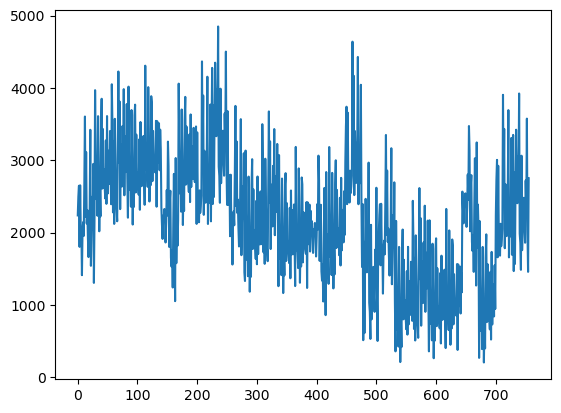

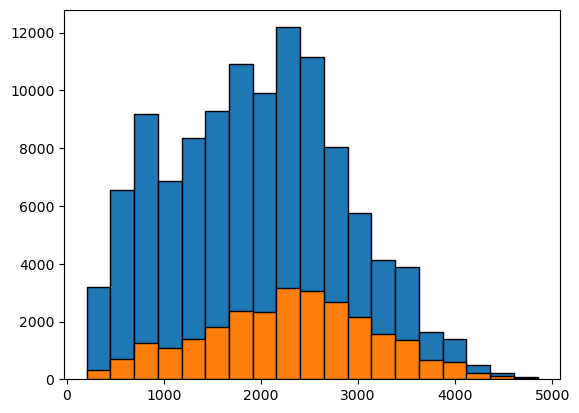

In [686]:
counts = finaldf[["dist_origin_hub", "dist_hub_customer","late_order"]].groupby([finaldf["origin_port"], finaldf["logistic_hub"], finaldf["customer"]]).value_counts()
a = np.array(counts.index)

b = [[],[],[]]
j = 0
for i in a:
    b[0].append(i[3]+i[4])
    b[1].append(i[5])
    b[2].append(counts[j])
    j += 1

h = [[],[],[]]
i = 0
j = 0
while i < len(b[0]):
    h[0].append(b[0][i])
    h[2].append(b[2][i])
    if (b[1][i] == 1):
        h[1].append(b[2][i])
    else:
        h[1].append(0)
        
    i += 1
    if (b[0][i] == b[0][i - 1]):
        h[2][j] += b[2][i]
        if (b[1][i] == 1):
            h[1][j]= b[2][i]
        i += 1
    j += 1
    
plt.plot(h[0])
#for i in range(len(h[0])):
#    h[1][i] = (h[1][i]/h[2][i])*5000
#plt.plot(h[1])
plt.show()

plt.hist((h[0]), weights=h[2], bins = 19, edgecolor = 'black')
plt.hist((h[0]), weights=h[1], bins = 19, edgecolor = 'black')
#plt.hist(cctripleprima, bins = 19, edgecolor = 'black')
#plt.xlabel("Units per order", fontsize=14)  
#plt.ylabel("Total orders", fontsize=14)
#plt.xticks(fontsize=12)  
#plt.yticks(fontsize=12)

finaldf2 = finaldf.copy()
finaldf2 = finaldf2.drop(finaldf2[finaldf2.late_order < 1].index)

cc = finaldf[["dist_origin_hub", "dist_hub_customer","late_order"]].groupby([finaldf["origin_port"], finaldf["logistic_hub"], finaldf["customer"]]).value_counts()
